In [133]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


<Axes: >

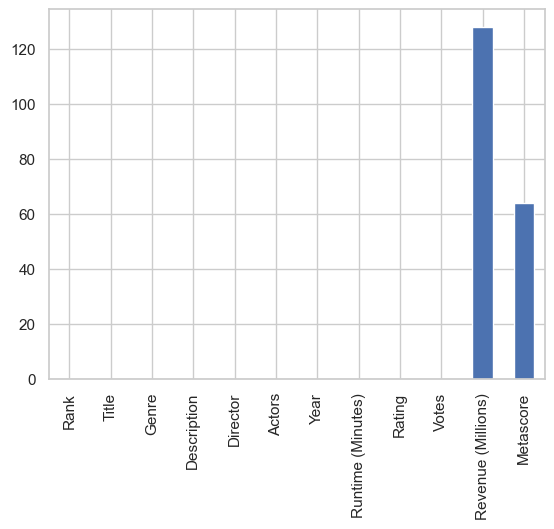

In [134]:
movies_data = pd.read_csv(r'IMDB_movie_data.csv')
print(movies_data.info())

# Checking the dataset for missing values
movies_data.isna().sum().plot(kind='bar')

In [135]:
movie_cleared = movies_data.dropna()
movie_cleared.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [136]:
# Describing the dataset
columns_to_describe = ["Metascore", "Revenue (Millions)", "Runtime (Minutes)"]
print(movie_cleared[columns_to_describe].describe())

        Metascore  Revenue (Millions)  Runtime (Minutes)
count  838.000000          838.000000         838.000000
mean    59.575179           84.564558         114.638425
std     16.952416          104.520227          18.470922
min     11.000000            0.000000          66.000000
25%     47.000000           13.967500         101.000000
50%     60.000000           48.150000         112.000000
75%     72.000000          116.800000         124.000000
max    100.000000          936.630000         187.000000


In [137]:
# Summary of dataset elements 

#Metascore groups 
movie_cleared_metascore = movie_cleared["Metascore"]
high_metascore = movie_cleared_metascore >=60
middle_metascore = (movie_cleared_metascore <60) & (movie_cleared_metascore >30)
low_metascore   =  movie_cleared_metascore <=30

#Revenue groups
movie_cleared_revenue = movie_cleared["Revenue (Millions)"]
high_revenue = movie_cleared_revenue >= movie_cleared_revenue.mean()
middle_revenue = (movie_cleared_revenue < movie_cleared_revenue.mean()) & (movie_cleared_revenue > movie_cleared_revenue.mean()/2)
low_revenue = movie_cleared_revenue <= movie_cleared_revenue.mean()/2


In [138]:
# Top 10 directors with the highest average metascore, only including directors with at least 10 movies
min_metascore_count = 3
top_directors = movie_cleared.groupby("Director")["Metascore"].agg([np.min, np.max, np.mean, "size"])
top_directors = top_directors.rename(columns={"amin": "Min Metascore", "amax": "Max Metascore", "mean": "Average Metascore", "size": "Count"})
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]
top_directors = top_directors.sort_values("Average Metascore", ascending=False).head(10)
print(top_directors)

                             Min Metascore  Max Metascore  Average Metascore  \
Director                                                                       
Wes Anderson                          83.0           88.0          85.000000   
Steve McQueen                         72.0           96.0          83.333333   
Ethan Coen                            72.0           91.0          81.000000   
David Fincher                         70.0           95.0          78.600000   
Alejandro González Iñárritu           69.0           88.0          77.666667   
Edgar Wright                          69.0           81.0          77.000000   
Martin Scorsese                       63.0           85.0          77.000000   
Guillermo del Toro                    64.0           98.0          76.500000   
David O. Russell                      56.0           90.0          76.500000   
Brad Bird                             60.0           96.0          76.333333   

                             Count  
Di

In [139]:
min_metascore_count = 3

# Top 10 directors with the highest average metascore, including revenue information
top_directors = movie_cleared.groupby("Director").agg({
    "Metascore": ["size", np.min, np.max, np.mean],
    "Revenue (Millions)": [np.min, np.max, np.mean]
}).round()
top_directors.columns = ["Count", "Min Mtscore", "Max Mtscore", "Avg Mtscore", "Min Rev mln","Max Rev mln", "Avg Rev mln"]
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]

# Sort by average metascore in descending order and get the top 10 directors
top_directors = top_directors.sort_values(["Avg Rev mln","Avg Mtscore"],ascending=False).head(10)

print(top_directors)

                   Count  Min Mtscore  Max Mtscore  Avg Mtscore  Min Rev mln  \
Director                                                                       
J.J. Abrams            5         66.0         82.0         75.0        127.0   
Francis Lawrence       4         64.0         76.0         68.0        256.0   
Christopher Nolan      5         66.0         82.0         75.0         53.0   
David Yates            6         44.0         87.0         68.0        127.0   
Jon Favreau            4         57.0         79.0         70.0         31.0   
Gore Verbinski         3         47.0         53.0         50.0          8.0   
Michael Bay            6         32.0         61.0         44.0         50.0   
Peter Jackson          4         42.0         66.0         56.0         44.0   
Phil Lord              3         69.0         83.0         74.0        138.0   
Bryan Singer           3         52.0         74.0         66.0        155.0   

                   Max Rev mln  Avg Rev

<Axes: title={'center': 'Top 10 Directors by Average Metascore'}, xlabel='Director'>

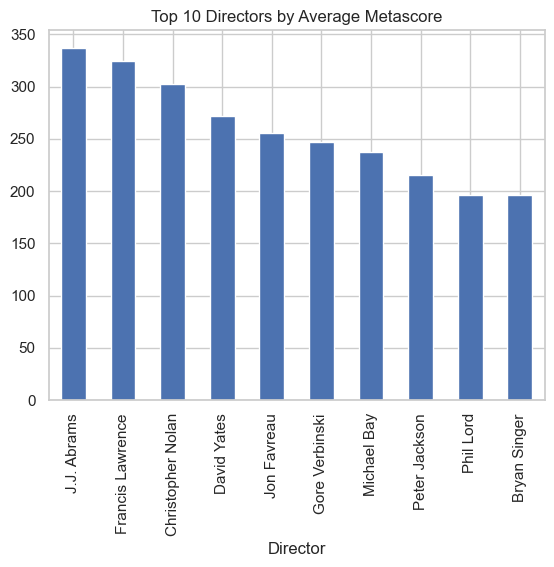

In [140]:
top_directors.plot(kind='bar', y="Avg Rev mln", title="Top 10 Directors by Average Metascore", legend=False)

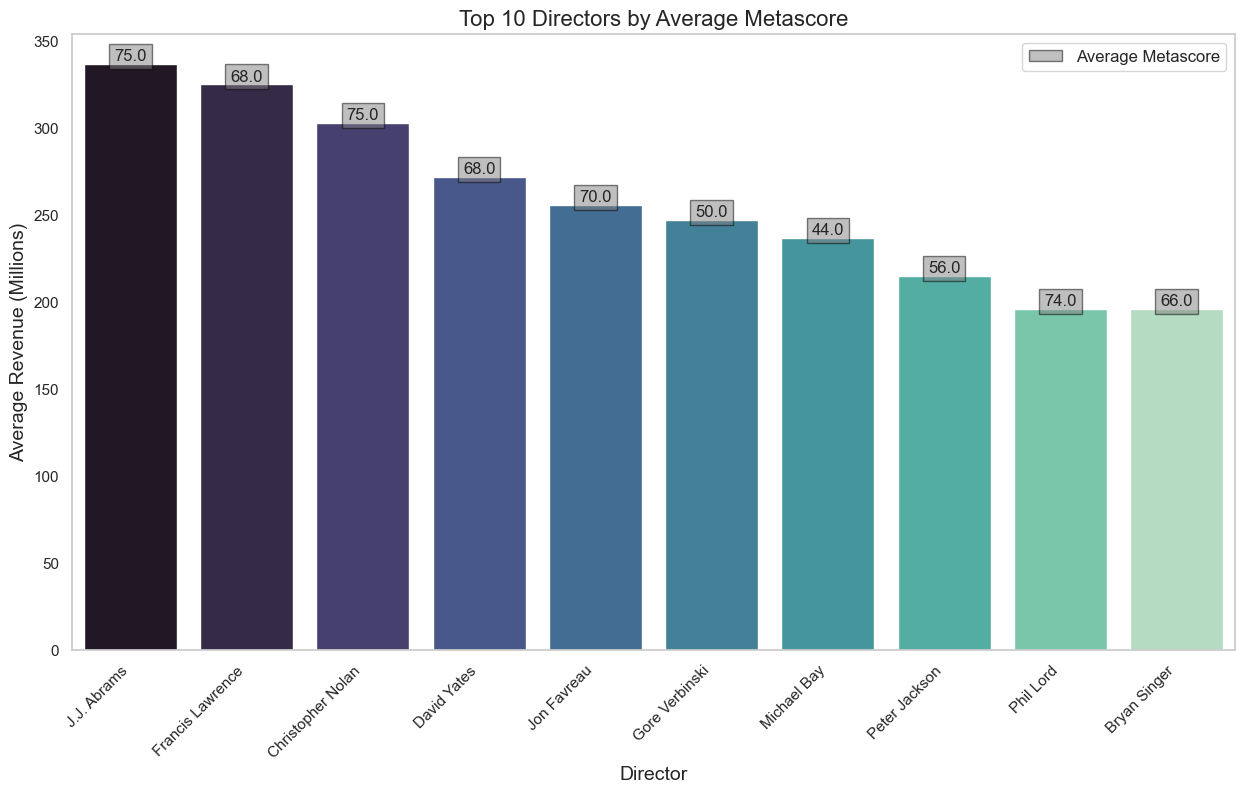

In [146]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors.index,
    y=top_directors["Avg Rev mln"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Metascore", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Revenue (Millions)", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Mtscore"]:.1f}', 
        xy=(i, row["Avg Rev mln"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Metascore')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()


In [ ]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors.index,
    y=top_directors["Avg Rev mln"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Metascore", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Revenue (Millions)", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Mtscore"]:.1f}', 
        xy=(i, row["Avg Rev mln"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Metascore')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()